In [406]:

import pandas as pd
import numpy as np
import os

In [407]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
home_directory = os.path.expanduser("~")
omnetpp_directory = os.path.join(home_directory, "omnetpp-6.0.2")
vec_directory = os.path.join(omnetpp_directory, "samples", "thesis", "results")

In [408]:
dispatchingAlgos = ["Local", "Random", "RandomWalk", "D2FO", "GreedyPartition", "RandomPartition", "Proposed"]
schedulingAlgos = ["FIFO", "EDF", "EDF", "EDF", "EDF", "EDF", "EDF"]
# dispatchingAlgos = ["D2FO", "GreedyPartition","RandomPartition", "Proposed"]
# schedulingAlgos = ["EDF", "EDF", "EDF", "EDF"]

numUsers = [user for user in range(1000, 3001 , 200)]
repetition = 1
for idx, dispatchingAlgo in enumerate(dispatchingAlgos):
    for numUser in numUsers:
        for i in range(repetition):
            command_vec = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-vec.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}.vec"
            command_sca = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-sca.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}.sca"
            os.system(command_vec)
            os.system(command_sca)


Exported 501 vectors
Exported 9 scalars, 20426 parameters
Exported 501 vectors
Exported 9 scalars, 23426 parameters
Exported 501 vectors
Exported 9 scalars, 26426 parameters
Exported 501 vectors
Exported 9 scalars, 29426 parameters
Exported 501 vectors
Exported 9 scalars, 32426 parameters
Exported 501 vectors
Exported 9 scalars, 35426 parameters
Exported 501 vectors
Exported 9 scalars, 38426 parameters
Exported 501 vectors
Exported 9 scalars, 41426 parameters
Exported 501 vectors
Exported 9 scalars, 44426 parameters
Exported 501 vectors
Exported 9 scalars, 47426 parameters
Exported 501 vectors
Exported 9 scalars, 50426 parameters
Exported 501 vectors
Exported 9 scalars, 20426 parameters
Exported 501 vectors
Exported 9 scalars, 23426 parameters
Exported 501 vectors
Exported 9 scalars, 26426 parameters
Exported 501 vectors
Exported 9 scalars, 29426 parameters
Exported 501 vectors
Exported 9 scalars, 32426 parameters
Exported 501 vectors
Exported 9 scalars, 35426 parameters
Exported 501 v

In [409]:

algoCompletionRate = []
algoCompletionTime = []
algoTotalReward = []

for idx, dispatchingAlgo in enumerate(dispatchingAlgos):
    completionRateWithDiffNumUsers = []
    completionTimeWithDiffNumUsers = []
    rewardWithDiffNumUsers = []
    for numUser in numUsers:
        accumulateCompletionRate = 0
        accumulateCompletionTime = 0
        accumulateReward = 0
        for i in range(repetition):
            sca_out = pd.read_csv(f"{vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-sca.csv")
            # print(f"{dispatchingAlgo}-{schedulingAlgos[idx]}-{numUser}-{i}")
            # if i == 0:
            #     display(sca_out[(sca_out['type'] == 'scalar')])
            sca_mean_row = sca_out[(sca_out['type'] == 'scalar') & (sca_out['name'] == 'isCompleted:mean')]
            sca_mean_row = sca_out[(sca_out['type'] == 'scalar')]
            accumulateCompletionRate += float(sca_mean_row[sca_mean_row['name'] == 'isCompleted:mean'].iloc[0]['value'])
            accumulateCompletionTime += float(sca_mean_row[sca_mean_row['name'] == 'totalTime:mean'].iloc[0]['value'])
            accumulateReward += float(sca_mean_row[sca_mean_row['name'] == 'totalReward:sum'].iloc[0]['value'])
        avgCompletionRate = accumulateCompletionRate / repetition
        avgCompletionTime = accumulateCompletionTime / repetition
        avgReward = accumulateReward / repetition
        completionRateWithDiffNumUsers.append(avgCompletionRate)
        completionTimeWithDiffNumUsers.append(avgCompletionTime)
        rewardWithDiffNumUsers.append(avgReward)
    algoCompletionRate.append(completionRateWithDiffNumUsers)
    algoCompletionTime.append(completionTimeWithDiffNumUsers)
    algoTotalReward.append(rewardWithDiffNumUsers)


# # Define the maximum width for each variable
# dispatching_width = 15
# scheduling_width = 5
# completion_rate_width = 5

# for idx in range(len(dispatchingAlgos)):
#     print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} completionRate is ", end="")
#     for j in range(len(numUsers)):
#         print(f"{algoCompletionRate[idx][j]:.6f}", end=" ")
#     print()

# print()
# for idx in range(len(dispatchingAlgos)):
#     print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} completionTime is ", end="")
#     for j in range(len(numUsers)):
#         print(f"{algoCompletionTime[idx][j]:.6f}", end=" ")
#     print()

# print()
# for idx in range(len(dispatchingAlgos)):
#     print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} reward is ", end="")
#     for j in range(len(numUsers)):
#         print(f"{algoTotalReward[idx][j]}", end=" ")
#     print()



In [410]:
import pandas as pd

completion_rate_data = {}
for idx, completion_rate in enumerate(algoCompletionRate):
    # algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    algo_key = f"{dispatchingAlgos[idx]}"
    completion_rate_data[algo_key] = completion_rate

completion_rate_df = pd.DataFrame(completion_rate_data, index=numUsers).transpose()
completion_rate_df.to_csv(f"{vec_directory}/completion_rate.csv")


completion_time_data = {}
for idx, completion_time in enumerate(algoCompletionTime):
    # algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    algo_key = f"{dispatchingAlgos[idx]}"
    completion_time_data[algo_key] = completion_time

completion_time_df = pd.DataFrame(completion_time_data, index=numUsers).transpose()
completion_time_df.to_csv(f"{vec_directory}/completion_time.csv")

reward_data = {}
for idx, reward in enumerate(algoTotalReward):
    # algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    algo_key = f"{dispatchingAlgos[idx]}"
    reward_data[algo_key] = reward

reward_df = pd.DataFrame(reward_data, index=numUsers).transpose()
reward_df.to_csv(f"{vec_directory}/reward.csv")

,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000
Local,75.14,71.03,66.88,63.14,59.57,56.11,53.36,50.56,47.86,45.61,43.38
Random,90.27,86.75,81.95,76.63,71.16,65.69,60.88,56.52,52.55,49.06,46.04
RandomWalk,83.88,75.80,67.28,61.12,56.20,52.29,49.01,46.23,43.52,41.17,39.16
D2FO,93.43,91.24,87.10,80.89,73.98,67.38,61.79,56.95,52.80,49.26,46.18
GreedyPartition,97.16,95.22,89.73,79.19,69.48,61.84,55.83,50.83,46.68,43.15,40.00
RandomPartition,95.19,91.31,84.31,75.19,66.09,58.44,52.62,47.65,43.71,40.13,37.13
Proposed,97.38,95.81,91.44,81.70,72.71,65.39,59.48,54.55,50.28,46.74,43.60


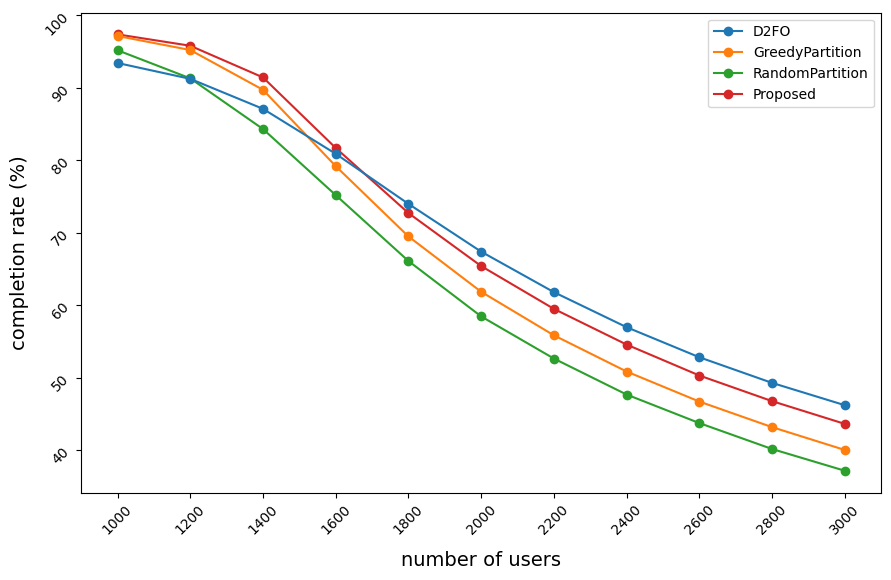

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

completion_rate_df = pd.read_csv(f"{vec_directory}/completion_rate.csv", index_col=0)
index = completion_rate_df.index
columns = completion_rate_df.columns
completion_rate_df = completion_rate_df.apply(pd.to_numeric, errors='coerce')
completion_rate_df.index = index
completion_rate_df.columns = columns

completion_rate_df = completion_rate_df.mul(100)
completion_rate_df = completion_rate_df.round(2)
display(completion_rate_df)


fig1 = plt.figure(figsize=(10,6))

columns = completion_rate_df.columns
x_values = range(len(columns))

ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
ax1.tick_params(labelrotation=45)

# p0 = ax1.plot(x_values, completion_rate_df.iloc[0], marker='o', zorder=7)  
# p1 = ax1.plot(x_values, completion_rate_df.iloc[1], marker='o', zorder=6)
# p2 = ax1.plot(x_values, completion_rate_df.iloc[2], marker='o', zorder=5)
p3 = ax1.plot(x_values, completion_rate_df.iloc[3], marker='o', zorder=4)
p4 = ax1.plot(x_values, completion_rate_df.iloc[4], marker='o', zorder=3)
p5 = ax1.plot(x_values, completion_rate_df.iloc[5], marker='o', zorder=2)
p6 = ax1.plot(x_values, completion_rate_df.iloc[6], marker='o', zorder=1)


# ax1.legend(handles=[p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]], 
#            labels=[completion_rate_df.iloc[0].name, completion_rate_df.iloc[1].name, completion_rate_df.iloc[2].name, 
#                    completion_rate_df.iloc[3].name, completion_rate_df.iloc[4].name, completion_rate_df.iloc[5].name, completion_rate_df.iloc[6].name])

ax1.legend(handles=[p3[0], p4[0], p5[0], p6[0]], 
           labels=[
                   completion_rate_df.iloc[3].name, completion_rate_df.iloc[4].name, completion_rate_df.iloc[5].name, completion_rate_df.iloc[6].name])

plt.ylabel('completion rate (%)', labelpad=10, fontsize=14)
# plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
plt.xlabel('number of users', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
# plt.title("Completion Rate", pad=20, fontsize=16)
plt.show()
fig1.savefig(f'{vec_directory}/completion_rate_graph.svg', format="svg", bbox_inches = "tight")


,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000
Local,90.53,93.19,95.93,98.41,100.85,103.00,105.02,106.86,108.70,110.01,111.59
Random,97.01,101.93,108.00,113.35,118.52,123.53,127.89,131.64,134.92,138.14,140.61
RandomWalk,90.16,97.23,103.38,107.37,110.31,112.96,115.28,117.82,120.03,122.26,123.89
D2FO,94.64,100.13,106.13,113.24,119.89,125.99,131.14,135.44,139.20,142.20,144.92
GreedyPartition,99.43,106.90,117.17,128.37,137.04,143.17,148.20,152.05,155.27,157.84,160.12
RandomPartition,101.53,109.09,118.86,127.66,135.92,142.25,147.60,151.81,155.14,157.85,160.05
Proposed,63.62,72.41,90.50,107.23,117.29,124.54,130.01,134.34,138.20,141.45,144.14


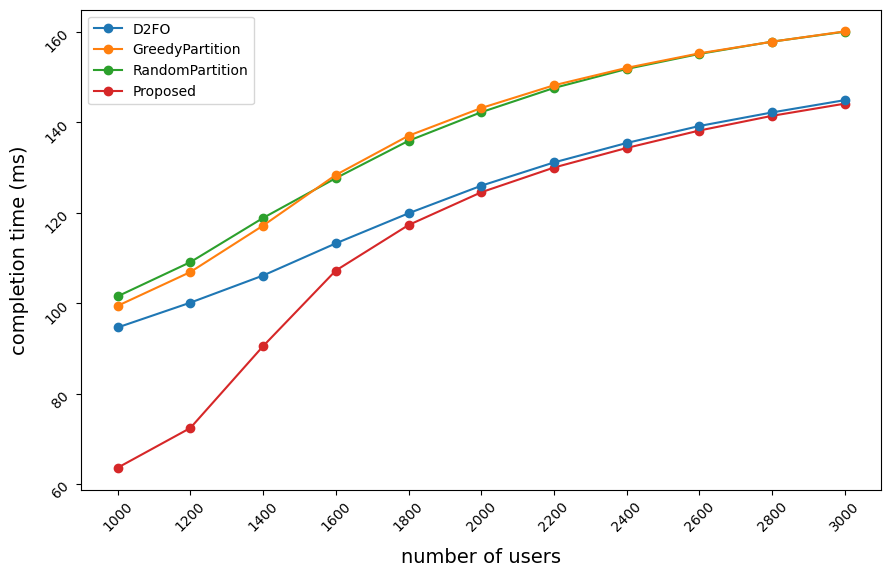

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

completion_time_df = pd.read_csv(f"{vec_directory}/completion_time.csv", index_col=0)
index = completion_time_df.index
columns = completion_time_df.columns
completion_time_df = completion_time_df.apply(pd.to_numeric, errors='coerce')
completion_time_df.index = index
completion_time_df.columns = columns

completion_time_df = completion_time_df.mul(1000)
completion_time_df = completion_time_df.round(2)
display(completion_time_df)




fig2 = plt.figure(figsize=(10,6))

columns = completion_time_df.columns
x_values = range(len(columns))

ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2.tick_params(labelrotation=45)
# p0 = ax2.plot(x_values, completion_time_df.iloc[0], marker='o', zorder=7)
# p1 = ax2.plot(x_values, completion_time_df.iloc[1], marker='o', zorder=6)
# p2 = ax2.plot(x_values, completion_time_df.iloc[2], marker='o', zorder=5)
p3 = ax2.plot(x_values, completion_time_df.iloc[3], marker='o', zorder=4)
p4 = ax2.plot(x_values, completion_time_df.iloc[4], marker='o', zorder=3)
p5 = ax2.plot(x_values, completion_time_df.iloc[5], marker='o', zorder=2)
p6 = ax2.plot(x_values, completion_time_df.iloc[6], marker='o', zorder=1)

# ax2.legend(handles=[p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]], 
#            labels=[completion_time_df.iloc[0].name, completion_time_df.iloc[1].name, completion_time_df.iloc[2].name, 
#                    completion_time_df.iloc[3].name, completion_time_df.iloc[4].name, completion_time_df.iloc[5].name, completion_time_df.iloc[6].name])

ax2.legend(handles=[p3[0], p4[0], p5[0], p6[0]], 
           labels=[
                   completion_time_df.iloc[3].name, completion_time_df.iloc[4].name, completion_time_df.iloc[5].name, completion_time_df.iloc[6].name])

plt.ylabel('completion time (ms)', labelpad=10, fontsize=14)
# plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
plt.xlabel('number of users', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
# plt.title("Completion Time", pad=20, fontsize=16)
plt.show()
fig2.savefig(f'{vec_directory}/completion_time_graph.svg', format="svg", bbox_inches = "tight")


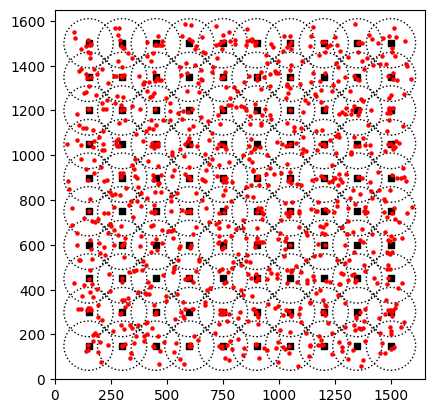

In [413]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y

# Define the dimensions of the grid
num_rows = 10
num_columns = 10

# Define the distance between each base station
distance = 150

# Initialize lists to store x and y coordinates of base stations
base_station_x_coords = []
bast_station_y_coords = []

# Generate coordinates for each base station
for x in range(distance, (num_rows + 1) * distance, distance):
    for y in range(distance, (num_columns + 1) * distance, distance):
        base_station_x_coords.append(x)
        bast_station_y_coords.append(y)

# Plot the base stations
for x, y in zip(base_station_x_coords, bast_station_y_coords):
    plt.scatter(x, y, color='black', marker='s', s=20)
    circle = plt.Circle((x, y), 110, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

# Generate random coordinates for users
num_users = 1000  # Number of users
num_users_per_region = num_users // (num_rows * num_columns)
user_x_coords = []
user_y_coords = []
for base_station_x, base_station_y in zip(base_station_x_coords, bast_station_y_coords):
    for i in range(num_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


# Plot the users
plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5)

# Set labels and title
# plt.xlabel('X Axis (m)')
# plt.ylabel('Y Axis (m)')
# plt.title('Base Stations Grid with Users')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

# Show the graph

plt.show()

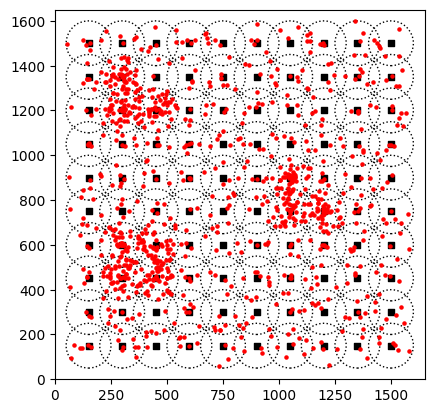

In [414]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y

# Define the dimensions of the grid
num_rows = 10
num_columns = 10

# Define the distance between each base station
distance = 150

# Initialize lists to store x and y coordinates of base stations
base_station_x_coords = []
bast_station_y_coords = []

# Generate coordinates for each base station
for y in range(distance, (num_columns + 1) * distance, distance):
    for x in range(distance, (num_rows + 1) * distance, distance):
        base_station_x_coords.append(x)
        bast_station_y_coords.append(y)

# Plot the base stations
for x, y in zip(base_station_x_coords, bast_station_y_coords):
    plt.scatter(x, y, color='black', marker='s', s=20)
    circle = plt.Circle((x, y), 100, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

# Generate random coordinates for users
user_x_coords = []
user_y_coords = []


num_users = 1000  # Number of users
hotspot_percent = 0.4

hotspot_idx = [21, 22, 31, 32, 46, 47, 56, 71, 72, 81]
hotspot_users_per_region = math.floor(num_users * hotspot_percent / len(hotspot_idx))
for idx in hotspot_idx:
    for i in range(hotspot_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x_coords[idx], bast_station_y_coords[idx], 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


users_per_region = math.floor(num_users * (1 - hotspot_percent) / (num_rows * num_columns))
for base_station_x, base_station_y in zip(base_station_x_coords, bast_station_y_coords):
    for i in range(users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


# Plot the users
plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5)

# Set labels and title
# plt.xlabel('X Axis (m)')
# plt.ylabel('Y Axis (m)')
# plt.title('Base Stations Grid with Users')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

# Show the graph

plt.show()